In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt


class Adaline(object):
   
    def __init__(self, num_features, epoch=10, learning_rate=.01):
        """
        :param num_features:
        """
        self.SSE = []  # sum of squared error
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.weights = np.random.randn(num_features + 1) * .01  # the first row is bias

    def train(self, inputs, labels):
        """
        batch learning
        trains the weights and biases based on input data and their corresponding label
        :param inputs: numpy array input
        :param labels: numpy array input's labels
        """
        for _ in range(self.epoch):
            prediction = self.predict(inputs)
            error = (labels - prediction)
            update = self.learning_rate * error
            self.weights[1:] += np.dot(update, inputs)
            self.weights[0] += update.sum()

            self.SSE.append((error ** 2).sum())

    def net_input(self, x):
        """
        :param x: the input array
        :return: calculates the activation function's input after weights multiplication
        """
        return np.dot(x, self.weights[1:]) + self.weights[0]

    def activation_function(self, X):
        """
        sigmoid activation function
        :param X: numpy array input
        :return: result of sigmoid function
        """
        # s = 1 / (1 + np.exp(-X))
        return X

    def predict(self, inputs):
        """
        :param inputs: numpy array input
        :return: tests the inputs by the trained weights
        """
        summation = self.net_input(inputs)
        activation = self.activation_function(summation)
        if len(activation.shape) < 1:
            return 1 if activation > .9 else 0 if activation < .1 else activation
        else:
            return [1 if a_ > .9 else 0 if a_ < .1 else a_ for a_ in activation]

    def score(self, inputs, labels):
        """
        calculating the classifier score by simply counting the number of correct sample targets
        :param inputs: numpy array of input train data
        :param labels: numpy array of train data label
        :return: the score of 100
        """
        return (np.count_nonzero(np.asarray(self.predict(inputs)) == labels) * 100) / inputs.shape[0]

    def SSE_plot(self):
        plt.plot(range(1, len(self.SSE) + 1), self.SSE, marker='o')
        plt.xlabel('Epoch')
        plt.ylabel('sum of squared error')
        plt.show()


def dataset1(standard=False):
    iris_dataset = pd.read_csv('iris.data', sep=',', header=None)
    # storing versicolor and setosa data
    # in addition to sepal length and petal length features
    X = iris_dataset.iloc[:100, [0, 2]].values
    y = iris_dataset.iloc[:100, -1].values
    y = np.where(y == 'Iris-setosa', 0, 1)

    if standard:
        # standardization of the two features
        X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
        X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
    return X, y, X_train, X_test, y_train, y_test


def dataset2():
    iris_dataset = pd.read_csv('iris.data', sep=',', header=None)
    # storing versicolor and virginica data
    # in addition to sepal width and petal width features
    X = iris_dataset.iloc[50:, [1, 3]].values
    y = iris_dataset.iloc[50:, -1].values
    y = np.where(y == 'Iris-virginica', 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
    return X, y, X_train, X_test, y_train, y_test


def decision_boundary(X, y, model, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = np.asarray(Z).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, marker=markers[idx], label=cl)
    plt.show()


the final weights are: [-0.28919459 -0.76414749  1.58671034]


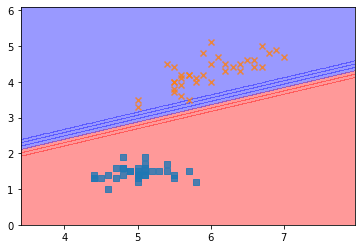

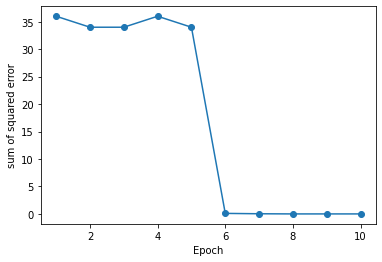

adaline score: 96.66666666666667


In [10]:
### section_1
X, _, X_train, X_test, y_train, y_test = dataset1()
adaline = Adaline(X.shape[1], epoch=10, learning_rate=.01)
adaline.train(X_train, y_train)
print('the final weights are:', adaline.weights)
decision_boundary(X_train, y_train, adaline)
adaline.SSE_plot()
print('adaline score:', adaline.score(X_test, y_test))

''' as we can see the network converges even with 10 epochs'''

the final weights are: [0.56580641 0.22829851 0.57009823]


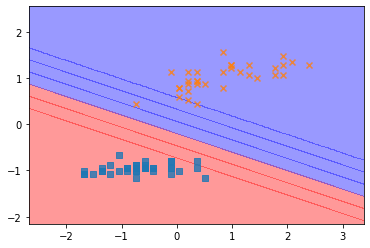

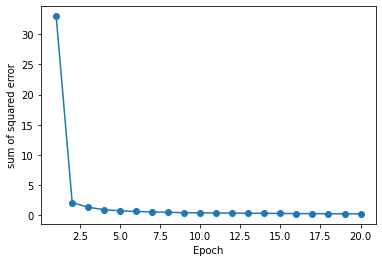

86.66666666666667


' after normalizing the input data the decision boundary and weights are changes\nadditionally its now taking longer to converge since the score of network is lower in comparision to previous section even with epochs doubled'

In [13]:
### section_2
X, _, X_train, X_test, y_train, y_test = dataset1(standard=True)
adaline = Adaline(X.shape[1], epoch=20, learning_rate=.01)
adaline.train(X_train, y_train)
print('the final weights are:', adaline.weights)
decision_boundary(X_train, y_train, adaline)
adaline.SSE_plot()
print(adaline.score(X_test, y_test))

''' after normalizing the input data the decision boundary and weights are changes
additionally its now taking longer to converge since the score of network is lower in comparision to previous section even with epochs doubled'''

the final weights are: [ 2.04446981  0.98727025 -2.69326966]


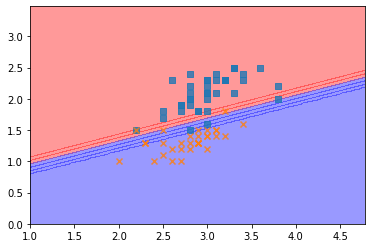

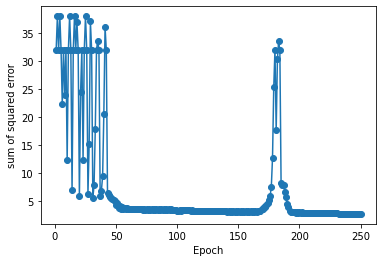

70.0


' as we can see the adaline netwoks does a better job(in comparison to perceptron) when two classes are inseparable and the data are mixed up\nthe reason is that the adaline tries to minimize the error function while perceptron tries to seperate the classes completely'

In [23]:
### section_3
X, _, X_train, X_test, y_train, y_test = dataset2()
adaline = Adaline(X.shape[1], epoch=250, learning_rate=.01)
adaline.train(X_train, y_train)
print('the final weights are:', adaline.weights)
decision_boundary(X_train, y_train, adaline)
adaline.SSE_plot()
print(adaline.score(X_test, y_test))

''' as we can see the adaline netwoks does a better job(in comparison to perceptron) when two classes are inseparable and the data are mixed up
the reason is that the adaline tries to minimize the error function while perceptron tries to seperate the classes completely'''